## Import necassary libraries

In [1]:
# Basic data handling 
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the data set
data = pd.read_csv('../artifacts/global_monthly_electricity_production_final.csv')
data.head()

,country,country_clean,region,is_developed,year,month,quarter,date,period,season,...,source_category,energy_type,electricity_production_gwh,share_of_total,is_renewable,is_fossil,energy_intensity_category,is_outlier,is_negative,is_zero
0,Argentina,Argentina,South America,False,2015,1,1,2015-01-01,2010-2014,Winter,...,Fossil Fuel,Conventional,2747.782,0.020080,False,True,Medium,False,False,False
1,Argentina,Argentina,South America,False,2015,1,1,2015-01-01,2010-2014,Winter,...,Renewable,Clean Energy,0.000,0.000000,True,False,Low,False,False,True
2,Argentina,Argentina,South America,False,2015,1,1,2015-01-01,2010-2014,Winter,...,Renewable,Clean Energy,31843.542,0.232530,True,False,High,False,False,False
3,Argentina,Argentina,South America,False,2015,1,1,2015-01-01,2010-2014,Winter,...,Fossil Fuel,Conventional,73921.692,0.536815,False,True,High,False,False,False
4,Argentina,Argentina,South America,False,2015,1,1,2015-01-01,2010-2014,Winter,...,Other,Other,137590.832,1.000000,False,False,Very High,False,False,False


## Data Preprocessing

### Data cleaning

In [3]:
# checking the rowa and columns of dataset
data.shape

(4720, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4720 entries, 0 to 4719
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     4720 non-null   object 
 1   country_clean               4720 non-null   object 
 2   region                      3947 non-null   object 
 3   is_developed                4720 non-null   bool   
 4   year                        4720 non-null   int64  
 5   month                       4720 non-null   int64  
 6   quarter                     4720 non-null   int64  
 7   date                        4720 non-null   object 
 8   period                      4720 non-null   object 
 9   season                      4720 non-null   object 
 10  year_category               4720 non-null   object 
 11  energy_source               4720 non-null   object 
 12  energy_source_clean         4720 non-null   object 
 13  source_category             4720 

In [5]:
# For statistical summary
data.describe()

,year,month,quarter,electricity_production_gwh,share_of_total
count,4720.000000,4720.0,4720.0,4720.000000,4720.000000
mean,2016.527966,1.0,1.0,23097.089180,0.216860
std,3.657118,0.0,0.0,36457.802211,0.306808
min,2010.000000,1.0,1.0,0.000000,0.000000
25%,2014.000000,1.0,1.0,541.248205,0.007759
50%,2017.000000,1.0,1.0,5859.888500,0.059464
75%,2020.000000,1.0,1.0,28157.274500,0.298918
max,2022.000000,1.0,1.0,171395.613718,1.000000


In [6]:
#Checking duplicate values
data.duplicated().sum()

np.int64(0)

In [7]:
# Checking the missing values
data.isnull().sum()

country                         0
country_clean                   0
region                        773
is_developed                    0
year                            0
month                           0
quarter                         0
date                            0
period                          0
season                          0
year_category                   0
energy_source                   0
energy_source_clean             0
source_category                 0
energy_type                     0
electricity_production_gwh      0
share_of_total                  0
is_renewable                    0
is_fossil                       0
energy_intensity_category       0
is_outlier                      0
is_negative                     0
is_zero                         0
dtype: int64

In [8]:
# Checking the missing percentage of region column 
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent['region'])

16.3771186440678


In [9]:
# Drop unnecassary columns of dataset
data = data.drop(columns=['region'])
data = data.drop(columns=['country'])

In [10]:
data = data.drop(columns=['energy_source'])

In [11]:
# Checking value counts
data['is_outlier'].value_counts()

is_outlier
False    4720
Name: count, dtype: int64

In [12]:
data['is_negative'].value_counts()

is_negative
False    4720
Name: count, dtype: int64

In [13]:
data['is_zero'].value_counts()

is_zero
False    4340
True      380
Name: count, dtype: int64

In [14]:
data['year_category'].value_counts()

year_category
Mid 2010s      2055
Early 2010s    1850
Late 2010s      815
Name: count, dtype: int64

In [15]:
data['is_developed'].value_counts()

is_developed
False    2393
True     2327
Name: count, dtype: int64

In [16]:
data['energy_source_clean'].value_counts()

energy_source_clean
Oil                           580
Solar                         567
Wind                          547
Hydro                         517
Natural Gas                   495
Coal                          445
Total Combustible Fuels       430
Geothermal                    406
Net Electricity Production    373
Nuclear                       360
Name: count, dtype: int64

In [17]:
# Drop unnecassary columns 
data = data.drop(columns=['is_outlier'])

In [18]:
data = data.drop(columns=['is_negative'])

In [19]:
data = data.drop(columns=['date'])

In [20]:
data = data.drop(columns=['period'])

In [21]:
data.head()

,country_clean,is_developed,year,month,quarter,season,year_category,energy_source_clean,source_category,energy_type,electricity_production_gwh,share_of_total,is_renewable,is_fossil,energy_intensity_category,is_zero
0,Argentina,False,2015,1,1,Winter,Early 2010s,Coal,Fossil Fuel,Conventional,2747.782,0.020080,False,True,Medium,False
1,Argentina,False,2015,1,1,Winter,Early 2010s,Geothermal,Renewable,Clean Energy,0.000,0.000000,True,False,Low,True
2,Argentina,False,2015,1,1,Winter,Early 2010s,Hydro,Renewable,Clean Energy,31843.542,0.232530,True,False,High,False
3,Argentina,False,2015,1,1,Winter,Early 2010s,Natural Gas,Fossil Fuel,Conventional,73921.692,0.536815,False,True,High,False
4,Argentina,False,2015,1,1,Winter,Early 2010s,Net Electricity Production,Other,Other,137590.832,1.000000,False,False,Very High,False


### Exploratory Data Analysis

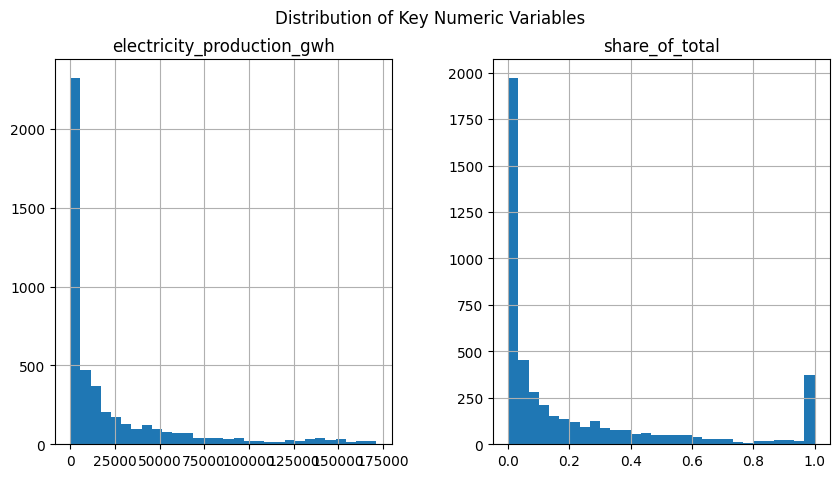

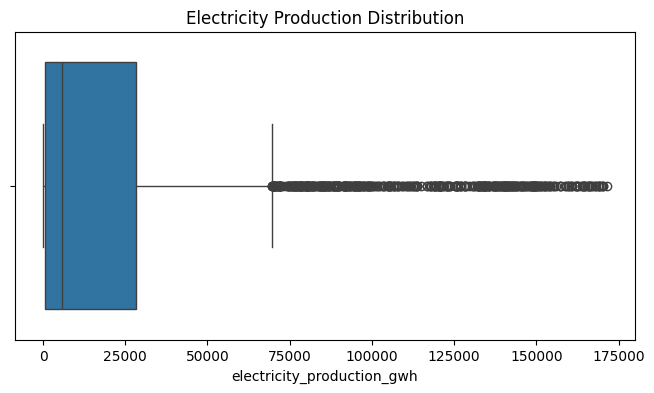

In [22]:
# Distribution of key numeric columns
numeric_cols = ['electricity_production_gwh', 'share_of_total']

data[numeric_cols].hist(bins=30, figsize=(10,5))
plt.suptitle("Distribution of Key Numeric Variables")
plt.show()

# Boxplot for production
plt.figure(figsize=(8,4))
sns.boxplot(x=data['electricity_production_gwh'])
plt.title("Electricity Production Distribution")
plt.show()


In [23]:
# Categorical variable overview
cat_cols = [
    'country_clean',
    'energy_source_clean',
    'energy_type',
    'source_category',
    'season',
    'is_renewable',
    'is_fossil',
    'is_developed'
]

for col in cat_cols:
    if col in data.columns:  # safeguard in case some columns are missing
        print(f"\n{col} — unique values: {data[col].nunique()}")
        print(data[col].value_counts().head())
    else:
        print(f"\n⚠️ Column '{col}' not found in dataset.")



country_clean — unique values: 52
country_clean
Netherlands    127
Portugal       126
Hungary        123
Belgium        121
Finland        121
Name: count, dtype: int64

energy_source_clean — unique values: 10
energy_source_clean
Oil            580
Solar          567
Wind           547
Hydro          517
Natural Gas    495
Name: count, dtype: int64

energy_type — unique values: 3
energy_type
Clean Energy    2397
Conventional    1950
Other            373
Name: count, dtype: int64

source_category — unique values: 4
source_category
Renewable      2037
Fossil Fuel    1950
Other           373
Nuclear         360
Name: count, dtype: int64

season — unique values: 1
season
Winter    4720
Name: count, dtype: int64

is_renewable — unique values: 2
is_renewable
False    2683
True     2037
Name: count, dtype: int64

is_fossil — unique values: 2
is_fossil
False    2770
True     1950
Name: count, dtype: int64

is_developed — unique values: 2
is_developed
False    2393
True     2327
Name: count, d

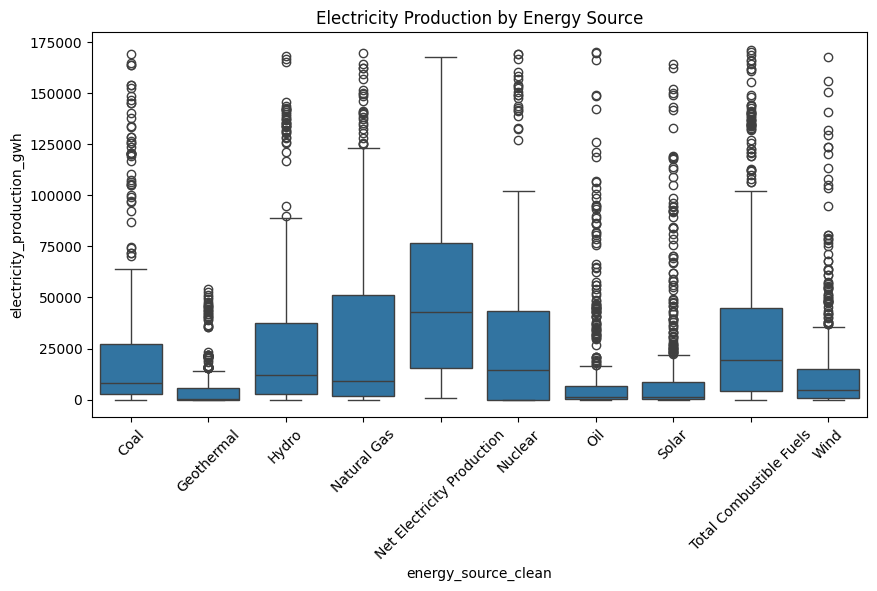

energy_source_clean
Net Electricity Production    53762.479260
Total Combustible Fuels       36184.595374
Natural Gas                   29678.456173
Nuclear                       29442.791430
Hydro                         26848.710098
Coal                          23958.143919
Wind                          13935.149892
Solar                         12282.408051
Oil                           11448.057569
Geothermal                     5779.695877
Name: electricity_production_gwh, dtype: float64

In [24]:
# Electricity Production by Energy Source
plt.figure(figsize=(10,5))
sns.boxplot(x='energy_source_clean', y='electricity_production_gwh', data=data)
plt.xticks(rotation=45)
plt.title("Electricity Production by Energy Source")
plt.show()

# Mean production by source
data.groupby('energy_source_clean')['electricity_production_gwh'].mean().sort_values(ascending=False)


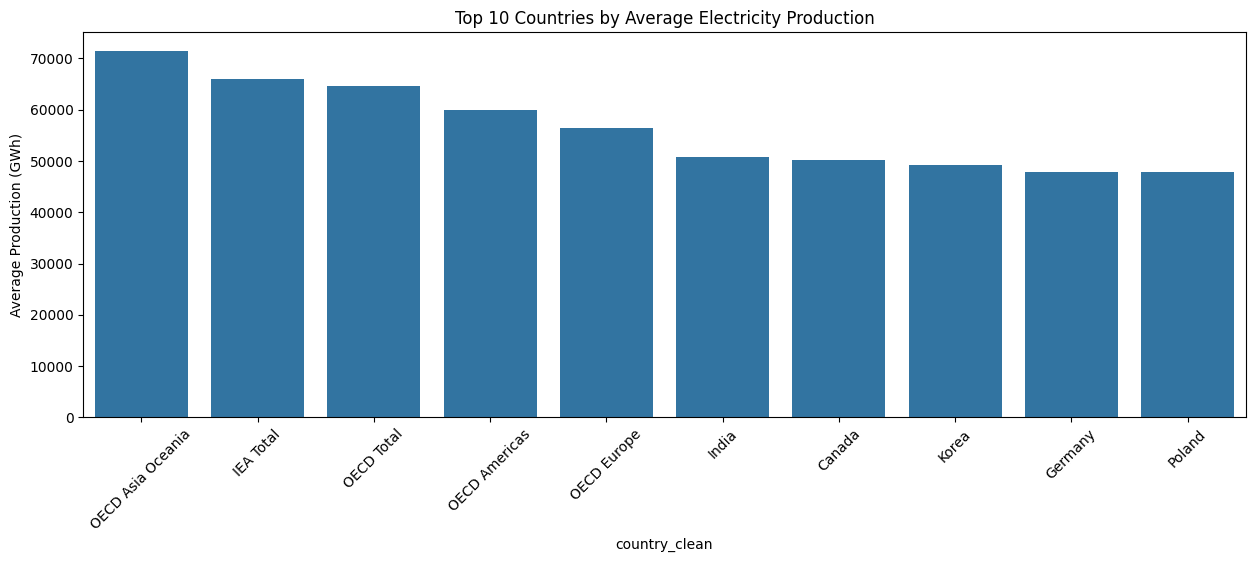

In [25]:
# Production by country
top_countries = data.groupby('country_clean')['electricity_production_gwh'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Average Electricity Production")
plt.xticks(rotation=45)
plt.ylabel("Average Production (GWh)")
plt.show()


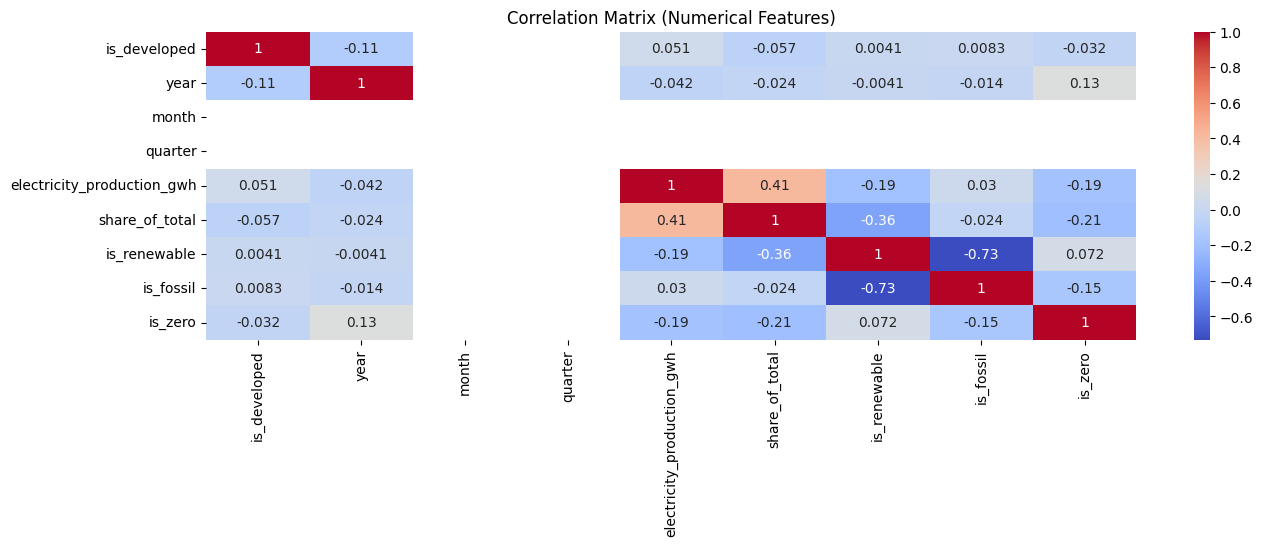

In [26]:
# Correlation Analysis
corr = data.corr(numeric_only=True)
plt.figure(figsize=(15,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

### Feature engineering

In [27]:
# Create a target variable to classification problem
median_production = data['electricity_production_gwh'].median()

data['production_level'] = (data['electricity_production_gwh'] >= median_production).astype(int)


In [28]:
# Remove the source of target variable and related columns because data leakage 
data = data.drop(columns=['electricity_production_gwh'])
data = data.drop(columns=['share_of_total'])

In [29]:
# Encoding categorical variables
# Binary columns — simple label encoding
binary_cols = ['is_developed', 'is_renewable', 'is_fossil', 'is_zero']
for col in binary_cols:
    data[col] = data[col].astype(int)

In [30]:
cols_to_encode = ['season', 'energy_source_clean', 'energy_type', 'source_category', 'year_category']

# Replace missing values first
data[cols_to_encode] = data[cols_to_encode].fillna('Unknown')

# Convert to string for safety
for col in cols_to_encode:
    data[col] = data[col].astype(str)

# One-hot encoding → force integer (0/1)
data = pd.get_dummies(data, columns=cols_to_encode, drop_first=False, dtype=int)


In [31]:
# Frequency encoding for high-cardinality columns (like country)
for col in ['country_clean']:
    freq = data[col].value_counts() / len(data)
    data[col] = data[col].map(freq)

In [32]:
# Ordinal encoding for energy intensity
ordinal_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
data['energy_intensity_category'] = data['energy_intensity_category'].map(ordinal_map)

In [33]:
data.head()

,country_clean,is_developed,year,month,quarter,is_renewable,is_fossil,energy_intensity_category,is_zero,production_level,...,energy_type_Clean Energy,energy_type_Conventional,energy_type_Other,source_category_Fossil Fuel,source_category_Nuclear,source_category_Other,source_category_Renewable,year_category_Early 2010s,year_category_Late 2010s,year_category_Mid 2010s
0,0.016737,0,2015,1,1,0,1,2,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.016737,0,2015,1,1,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
2,0.016737,0,2015,1,1,1,0,3,0,1,...,1,0,0,0,0,0,1,1,0,0
3,0.016737,0,2015,1,1,0,1,3,0,1,...,0,1,0,1,0,0,0,1,0,0
4,0.016737,0,2015,1,1,0,0,4,0,1,...,0,0,1,0,0,1,0,1,0,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4720 entries, 0 to 4719
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   country_clean                                   4720 non-null   float64
 1   is_developed                                    4720 non-null   int64  
 2   year                                            4720 non-null   int64  
 3   month                                           4720 non-null   int64  
 4   quarter                                         4720 non-null   int64  
 5   is_renewable                                    4720 non-null   int64  
 6   is_fossil                                       4720 non-null   int64  
 7   energy_intensity_category                       4720 non-null   int64  
 8   is_zero                                         4720 non-null   int64  
 9   production_level                         

## Model Building

In [35]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [36]:
# Define X and y
X = data.drop('production_level', axis=1)   # replace 'target_column' with your target variable name
y = data['production_level']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3776, 30)
Testing set shape: (944, 30)


In [37]:
# Feature Scalling to the ditance bsed algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Logistic regression

In [38]:
# Build model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

#### Random forest

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

#### Support vector machine (SVM)

In [40]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

#### K-Nearest Neighbors (KNN)

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)


In [42]:
# Evaluate the models perfomance 
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model
}

for name, model in models.items():
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        X_test_used = X_test_scaled
    else:
        X_test_used = X_test

    y_pred = model.predict(X_test_used)

    print(f"\n🔹 {name} Evaluation 🔹")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔹 Logistic Regression Evaluation 🔹
Accuracy: 0.926906779661017
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       472
           1       0.98      0.87      0.92       472

    accuracy                           0.93       944
   macro avg       0.93      0.93      0.93       944
weighted avg       0.93      0.93      0.93       944

Confusion Matrix:
 [[463   9]
 [ 60 412]]

🔹 Random Forest Evaluation 🔹
Accuracy: 0.9364406779661016
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       472
           1       0.94      0.93      0.94       472

    accuracy                           0.94       944
   macro avg       0.94      0.94      0.94       944
weighted avg       0.94      0.94      0.94       944

Confusion Matrix:
 [[445  27]
 [ 33 439]]

🔹 SVM Evaluation 🔹
Accuracy: 0.5
Classification Report:
               precision    recall

### Random forest is the best model

In [43]:
# Evaluate on training and test set for check underfitting or overfitting 
# Predictions on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

Training Accuracy: 0.9370
Testing Accuracy:  0.9163


#### Hyperparameter tunning for push accuracy slightly higher 

In [44]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)

In [45]:
param_grid = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [None, 10, 20, 30],         
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['sqrt', 'log2'],        
    'bootstrap': [True, False]             
}


In [46]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9393556186271418


In [47]:
best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred_best = best_rf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Final Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


✅ Final Test Accuracy: 0.9438559322033898
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       472
           1       0.96      0.92      0.94       472

    accuracy                           0.94       944
   macro avg       0.94      0.94      0.94       944
weighted avg       0.94      0.94      0.94       944

Confusion Matrix:
 [[455  17]
 [ 36 436]]


In [48]:
# Check Training & Testing Accuracy After Hyperparameter Tuning
# Best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Training and testing predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

Training Accuracy: 0.9719
Testing Accuracy:  0.9439


The train and test accuracies are close (difference < 3%), meaning the model generalizes well.

Both accuracies are high, showing the model captures meaningful patterns without memorizing noise.

model is neither overfitting nor underfitting.

#### Feature importance for random forest 

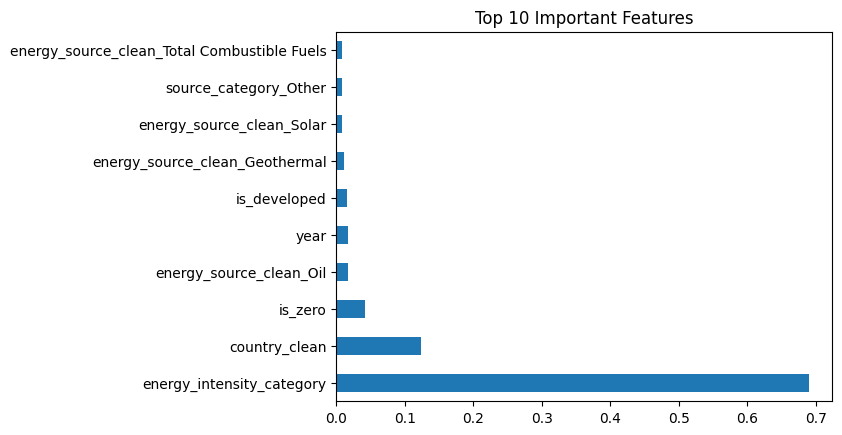

In [49]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()